In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
dataset = pd.read_csv('data.csv')
x=dataset.iloc[:, [6, 7]].values
y=dataset.iloc[:, -2].values

In [49]:
dataset.head()

,SONG,ARTIST,GENRE,ALBUM,ALBUM DATE,LENGTH,POPULARITY,DANCE,ENERGY,HAPPY,SPEECH,ACOUSTIC,INSTRUMENTAL,LIVE,LOUD,TEMP,KEY,CAMELOT,TIME SIGNATURE,ID
0,Kryptonite,3 Doors Down,Alternative Rock,The Better Life,2000,3:53,82,55,87,54,3,1,0,17,-6 db,99,B Minor,10A,4,6ZOBP3NvffbU4SZcrnt1k6
1,Flying,Anathema,Progressive Doom,Hindsight,2008,6:27,33,25,55,5,3,13,0,13,-8 db,145,C Minor,5A,3,4LknIoUqp497nUCdcd6nRs
2,One Last Goodbye,Anathema,Progressive Doom,Hindsight,2008,6:03,31,38,23,10,3,76,0,9,-8 db,100,B Minor,10A,3,1jUsNXxk8rz82nUYPnsGla
3,Velvet Goldmine,David Bowie,Glam Rock,Five Years,2015,3:10,42,62,63,89,3,64,0,16,-12 db,94,F Major,7B,4,6GCNEAIZVH4lKQD30lfQ6f
4,Lose Yourself,Eminem,Hip-Hop,8 Mile,2002,5:20,70,68,74,6,27,1,0,29,-5 db,171,D Major,10B,4,6GkTKjv1XbFVdI2D8vvDPu


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [53]:
y_pred = classifier.predict(x_test) 

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm) 

[[ 0  3]
 [ 0 10]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


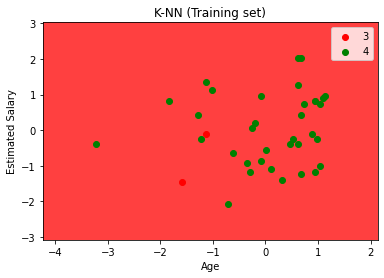

In [55]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape) ,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


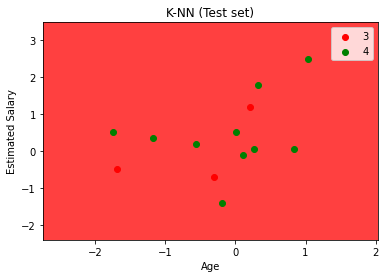

In [56]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape) ,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()